<a href="https://colab.research.google.com/github/bhattacharya5/Computer_Vision/blob/main/M21AIE211_PA0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Build and install OpenCV on your system. Verify the installation.


In [1]:
!pip install opencv-python

In [2]:
import cv2
print(cv2.__version__)

4.8.0


## 2. Load and view a JPG image from your system using OpenCV.



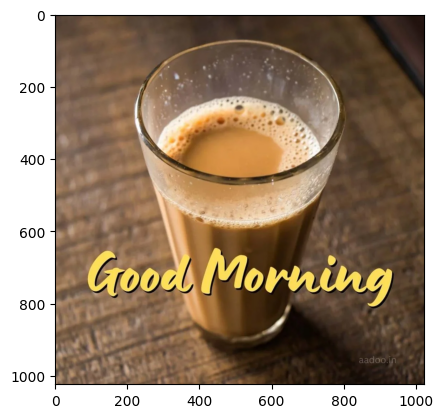

In [4]:
import cv2
from matplotlib import pyplot as plt

# Replace 'path/to/your/image.jpg' with the actual path to your JPG image
img_path = '/content/Good_Morning.jpg'

# Load the image
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is not None:
    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# 3. Perform the following operations on the loaded image, visualize and save each output generated:
## a. Visualize each channel as a grayscale

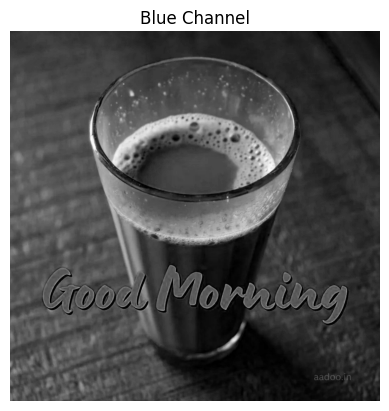

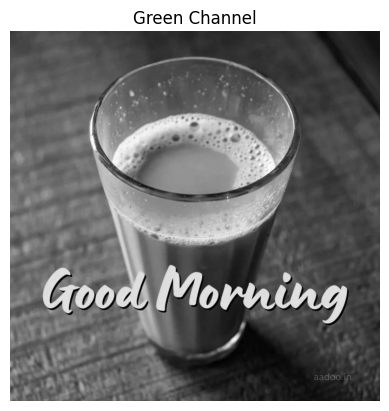

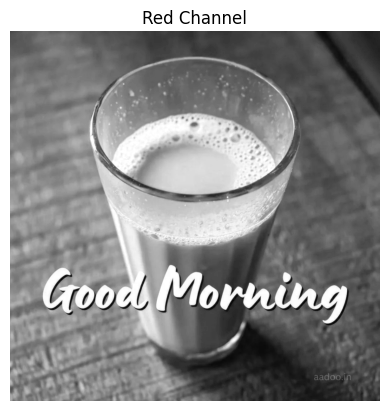

In [8]:
# Split the image into channels
channels = cv2.split(img)

# Define channel names
channel_names = {
    0: 'Blue',
    1: 'Green',
    2: 'Red'
}

# Visualize and save each channel as grayscale
for i, channel in enumerate(channels):
    # Display the channel using matplotlib
    plt.imshow(channel, cmap='gray')
    plt.title(f'{channel_names[i]} Channel')
    plt.axis('off')
    plt.show()

###b. Crop a desired region of interest from above  image

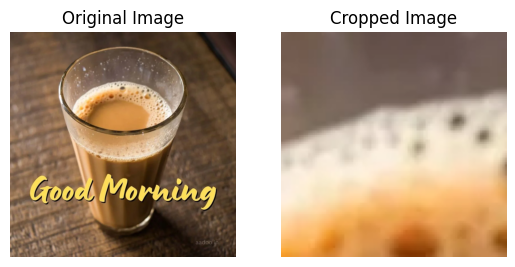

In [11]:
# Replace with your desired coordinates
roi_coordinates = (200, 300, 400, 500)

# Crop the ROI from the image
#This specifies the range of rows (vertical coordinates) to include in the ROI. roi_coordinates[0] is the starting row, and roi_coordinates[1] is the ending row.
#So, it's selecting rows from roi_coordinates[0] to roi_coordinates[1].
roi = img[roi_coordinates[0]:roi_coordinates[1], roi_coordinates[2]:roi_coordinates[3]]

# Display the original and cropped images using matplotlib
#plt.subplot(1, 2, 1) is specifying a subplot grid with 1 row and 2 columns,
#and it's selecting the first leftmost subplot in that grid.
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

#plt.subplot(1, 2, 2) is specifying a subplot grid with 1 row and 2 columns,
#and it's selecting the rightmost subplot in that grid.
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.show()

###c.Resize the image to a smaller and larger size, observe the effect of various interpolation techniques

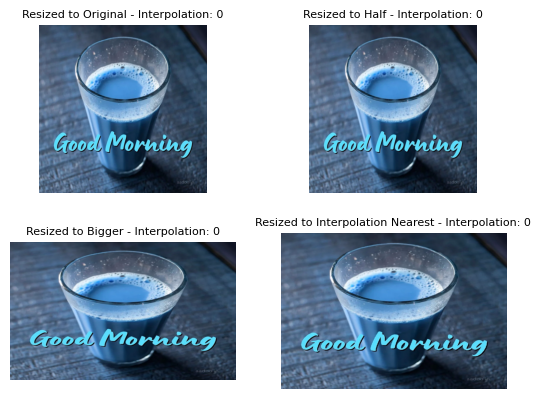

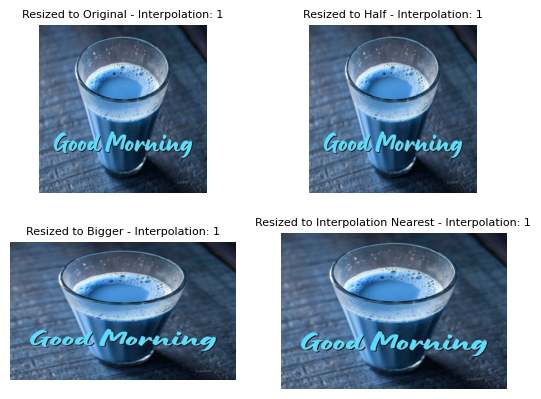

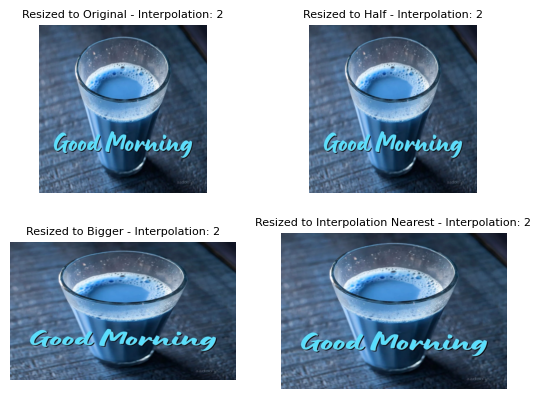

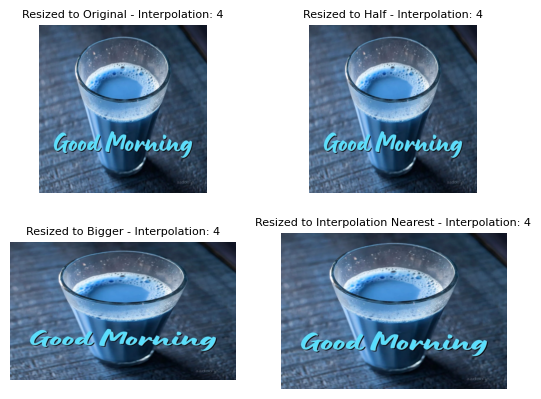

In [16]:
for interpolation_method in [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]:
  half = cv2.resize(img, (0, 0), fx = 0.5, fy = 0.5)
  bigger = cv2.resize(img, (1650, 1010))
  stretch_near = cv2.resize(img, (780, 540),interpolation = interpolation_method)


  Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
  images =[img, half, bigger, stretch_near]
  count = 4

  for i in range(count):
      plt.subplot(2, 2, i + 1)
      plt.title(Titles[i])
      plt.title(f'Resized to {Titles[i]} - Interpolation: {interpolation_method}', fontsize=8)
      plt.axis('off')
      plt.imshow(images[i])

  plt.show()

###d.Rotate the image by the following degrees in the anti-clockwise direction
30, 90, 180

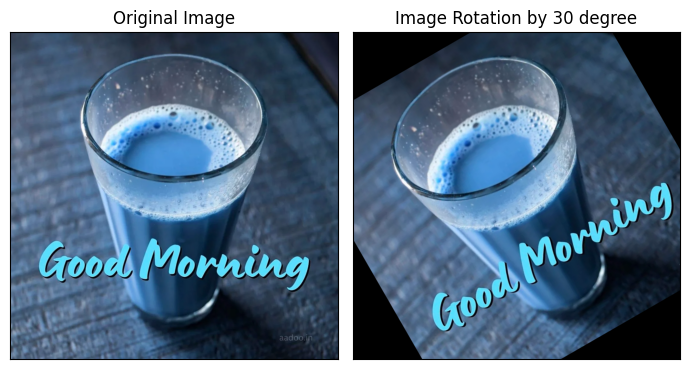

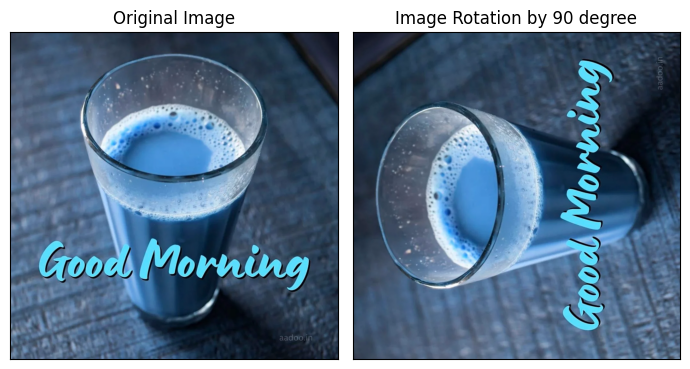

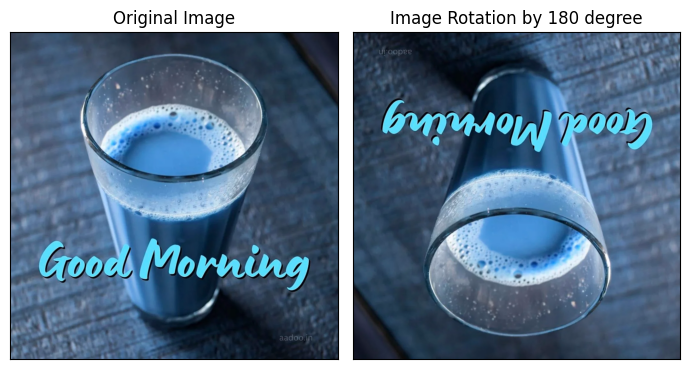

In [23]:
image_rgb = img
# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = [30,90,180]
scale = 1

for i in range(len(angle)):
  # getRotationMatrix2D creates a matrix needed for transformation.
  rotation_matrix = cv2.getRotationMatrix2D(center, angle[i], scale)

  # We want matrix for rotation w.r.t center to 30 degree without scaling.
  rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(7, 4))

  # Plot the original image
  axs[0].imshow(image_rgb)
  axs[0].set_title('Original Image')

  # Plot the Rotated image
  axs[1].imshow(rotated_image)
  axs[1].set_title(f'Image Rotation by {angle[i]} degree')

  # Remove ticks from the subplots
  for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

  # Display the subplots
  plt.tight_layout()
  plt.show()

###e.Translate the image by 2 pixels in any direction.

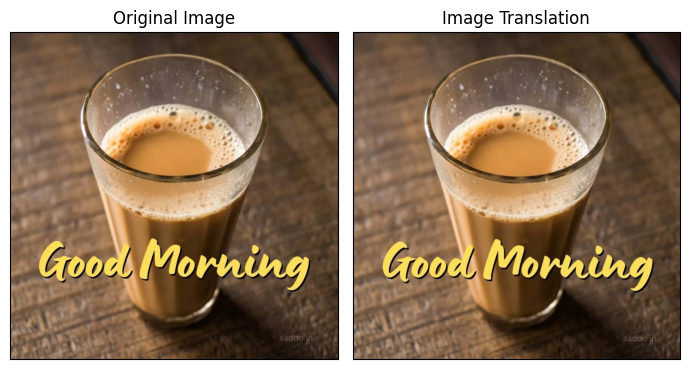

In [24]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read image from disk.
img = img
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Translation matrix
tx = 2
ty = 2
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)

# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')

# Remove ticks from the subplots
for ax in axs:
	ax.set_xticks([])
	ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


###f.Normalize the image to the [0,1] range, observe the effect of various normalization techniques

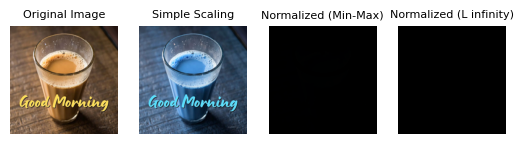

In [29]:
# Load the image
original_image = img

# Normalize the image to the [0, 1] range using various techniques

# Simple scaling by 255.0
normalized_image_1 = original_image / 255.0
# Min-Max normalization
normalized_image_2 = cv2.normalize(original_image, None, 0, 1, norm_type=cv2.NORM_MINMAX)
# L infinity normalization
normalized_image_3 = cv2.normalize(original_image, None, alpha=0, beta=1, norm_type=cv2.NORM_INF)

# Display the original and normalized images
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=8)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(normalized_image_1)
plt.title('Simple Scaling', fontsize=8)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(normalized_image_2)
plt.title('Normalized (Min-Max)', fontsize=8)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(normalized_image_3)
plt.title('Normalized (L infinity)', fontsize=8)
plt.axis('off')

plt.show()

### g.Calculate the intensity histogram and visualize it using Matplotlib.

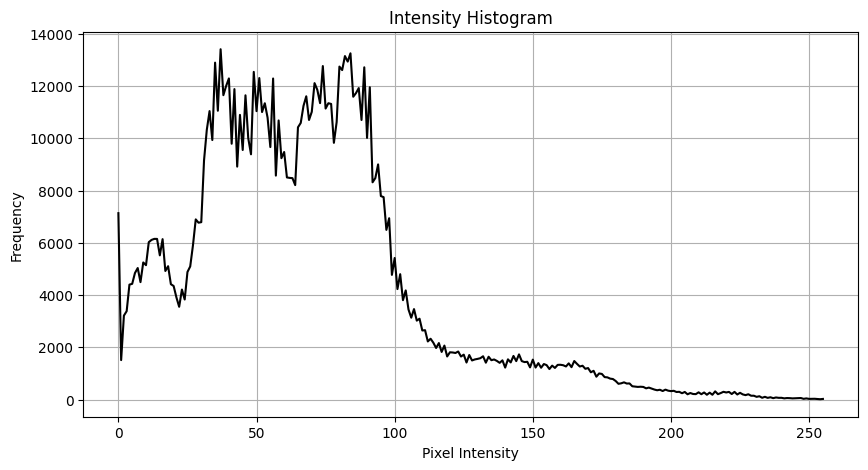

In [30]:
# Calculate the intensity histogram
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(histogram, color='black')
plt.title('Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()